# Gross-Pitaevskii equation with magnetism

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.024376e+01     8.479857e+00
 * time: 0.0017898082733154297
     1     2.960676e+01     5.183601e+00
 * time: 0.006314992904663086
     2     1.975359e+01     4.677312e+00
 * time: 0.010802984237670898
     3     1.394393e+01     3.086150e+00
 * time: 0.015009880065917969
     4     1.101789e+01     1.522702e+00
 * time: 0.07433485984802246
     5     9.253124e+00     9.399717e-01
 * time: 0.07851099967956543
     6     8.827923e+00     9.895621e-01
 * time: 0.08213186264038086
     7     8.496612e+00     7.790640e-01
 * time: 0.08549785614013672
     8     8.216773e+00     7.028231e-01
 * time: 0.08896493911743164
     9     8.040060e+00     8.012980e-01
 * time: 0.09277176856994629
    10     7.929848e+00     4.044210e-01
 * time: 0.09657478332519531
    11     7.925694e+00     8.302814e-01
 * time: 0.09990596771240234
    12     7.921339e+00     7.324927e-01
 * time: 0.10323977470397949
    13     7.873473e+00     4.339118e-01
 * 

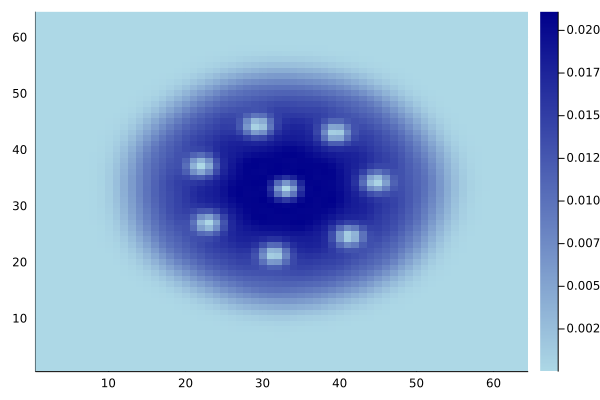

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         PowerNonlinearity(C, α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)